# <font color='blue'> Week - 2: Would you survive it? </font>
*Provided by:*
![ENSTABrain](images/LogoEB.png)

# <font color='blue'>Agenda</font>

- Titanic: Machine learning from disaster
- Dataset importation and visualization
- Cleaning data
- Decision Trees and Random Forests
- Cross Validation

# <font color='blue'>Understanding the titanic disaster</font>

## <font color='red'>Facts</font>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing most passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this Course, we will complete the analysis of what sorts of people were likely to survive. In particular, we will apply the tools of machine learning to predict which passengers survived the tragedy.



## <font color='red'>Data Observations</font>

** Let's start by importing the required dependencies**

In [1]:
import pandas as pd # data handling
import numpy as np # makes numerical calculations on matrix easier
import matplotlib.pyplot as plt # data visualization
# and the magic line to make plots appear on the notebook
%matplotlib inline

** Now to loading the data**

![csv_pic](images/csv_pic.png)

In [2]:
# pandas.read_csv() method reads data from a csv file into a dataframe
raw_data = pd.read_excel('data/titanic3.xls', 'titanic3')
# have a look at the dataframe
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**The column heading variables have the following meanings:**

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

**Let's move to an advanced analysis of our data**

First, let’s examine the overall chance of survival for a Titanic passenger.

In [3]:
raw_data['survived'].mean()

0.3819709702062643

The calculation shows that only 38% of all passengers survived, which is far from the best odds. The reason for this massive loss is that the titanic was only equipped with 20 lifeboats, which was not nearly enough for 1,317 passengers and 885 crew members aboard. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to examine the social dynamics that determined who got a place on a lifeboat and who did not.

Back in 1912, social classes were heavily stratified. This was especially true on the Titanic where the luxurious first class areas were off limits for the second and third class passengers. To have an idea about the composition of each class, we can group our data by class, and view the averages for each attribute:

In [4]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


We can start drawing some interesting insights from this data. For instance, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class. The average ticket price for first class (£87.5) is equivalent to $13,487 in 2016.

We can extend our statistical breakdown using the grouping function for both class and sex:

In [5]:
class_sex_grouping = raw_data.groupby(['pclass', 'sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

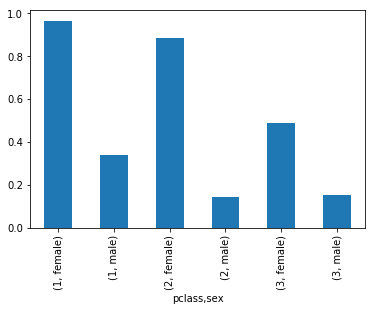

In [10]:
class_sex_grouping['survived'].plot.bar()

While the Titanic was sinking, the officers famously prioritized who was allowed in a lifeboat with the strict maritime tradition of evacuating women and children first. Our statistical results clearly reflect the first part of this policy as, across all classes, women were much more likely to survive than the men. We can also see that the women were younger than the men on average, were more likely to be traveling with family, and paid slightly more for their tickets.

The effectiveness of the second part of this “Women and children first” policy can be deduced by breaking down the survival rate by age.

In [6]:
# let's start by creating the edges of our age groups
arange = np.arange(0, 90, 10)
arange

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [7]:
# pandas.cut() will determine the interval to which each person's
# age belongs to
group_by_age = pd.cut(raw_data["age"], arange)
group_by_age.head()

0    (20, 30]
1     (0, 10]
2     (0, 10]
3    (20, 30]
4    (20, 30]
Name: age, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [8]:
# see the correlation
raw_data['age'].head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

In [9]:
# group persons by age intervals
age_grouping = raw_data.groupby(group_by_age).mean()
age_grouping

,pclass,survived,age,sibsp,parch,fare,body
age,,,,,,,
"(0, 10]",2.651163,0.581395,4.304264,1.709302,1.406977,29.436044,4.000000
"(10, 20]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050,159.307692
"(20, 30]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013,170.393939
"(30, 40]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507,155.343750
"(40, 50]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231,151.909091
"(50, 60]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347,159.777778
"(60, 70]",1.518519,0.222222,63.537037,0.333333,0.444444,66.131250,207.875000
"(70, 80]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567,96.500000


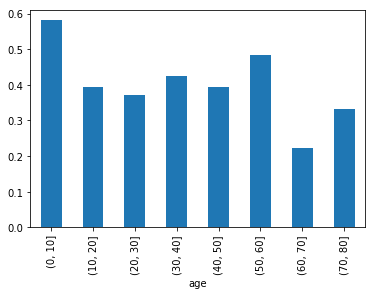

In [10]:
# visualize it
age_grouping['survived'].plot.bar()

Here we can see that children were indeed the most likely age group to survive, although this percentage was still tragically below 60%.

## <font color='red'>Why machine learning</font>

With analysis, we can draw some fairly straightforward conclusions from this data — being a woman, being in 1st class, and being a child were all factors that could boost your chances of survival during this disaster.

Let’s say we wanted to write a program to predict whether a given passenger would survive the disaster. This could be done through an elaborate system of nested if-else statements with some sort of weighted scoring system, but such a program would be long, tedious to write, difficult to generalize, and would require extensive fine tuning.  

This is where machine learning comes in: we will build a program that learns from the sample data to predict whether a given passenger would survive.

**Either that or for fun :p**

# <font color='blue'>Cleaning the data (Preprocessing)</font>

One of the biggest challenges for a data scientist is to prepare his dataset and make it as optimal as possible for his intelligent machine. Some actions that need to be done are removing missing values, splitting into train and test sets, or even simplifying features (attributes) for the model.

If we perform a count of each column, we will see that much of the data on certain fields is missing. Most machine learning algorithms will have a difficult time handling missing values, so we will need to make sure that each row has a value for each column.

In [11]:
raw_data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [12]:
# visualize the data before dropping
raw_data.shape

(1309, 14)

In [13]:
# remove the unnecessary columns
raw_data.drop(['cabin', 'body', 'boat', 'home.dest'], axis=1, inplace=True)
raw_data.shape

(1309, 10)

In [14]:
# Let's look out for missing values
raw_data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C


In [15]:
raw_data.dropna(how='any', inplace=True)
raw_data.shape

(1043, 10)

In [16]:
raw_data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C


since sklearn models only accept numerical values as inputs or outputs, there is an urgent need of changing all categorical values ( strings that represent groups of features ) to numerical values

example:
![labelencoder](images/Color-Label-Encoder.png)

In [17]:
from sklearn import preprocessing

def preprocess_data(df):
    le = preprocessing.LabelEncoder()
    df['sex'] = le.fit_transform(df.sex)
    df['embarked'] = le.fit_transform(df.embarked)
    return df

raw_data = preprocess_data(raw_data)

In [18]:
raw_data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,2
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,2
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,2
5,1,1,"Anderson, Mr. Harry",1,48.0000,0,0,19952,26.5500,2
6,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.0000,1,0,13502,77.9583,2
7,1,0,"Andrews, Mr. Thomas Jr",1,39.0000,0,0,112050,0.0000,2
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.0000,2,0,11769,51.4792,2
9,1,0,"Artagaveytia, Mr. Ramon",1,71.0000,0,0,PC 17609,49.5042,0


Our data is all in one matrix, but as we said, in order to train a machine in a supervised way, we need to have inputs matrix X and an output vector y. that's why we need to choose the feature columns.

In [19]:
features_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

X = raw_data[features_cols]
y = raw_data['survived']
print(X.shape)
print(y.shape)

(1043, 7)
(1043,)


In [20]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,29.0000,0,0,211.3375,2
1,1,1,0.9167,1,2,151.5500,2
2,1,0,2.0000,1,2,151.5500,2
3,1,1,30.0000,1,2,151.5500,2
4,1,0,25.0000,1,2,151.5500,2


In [21]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

## <font color='blue'>Build it, Train it, Test it</font>

First, Let's talk about the models we're going to use: **Decision Trees**

![decisionTree](images/decisionTree.jpg)

**metrics**

**Gini impurity**

$$I_{G}(p) = \sum_{i=1}^{J} p_i (1-p_i) = \sum_{i=1}^{J} (p_i - {p_i}^2) = \sum_{i=1}^J p_i - \sum_{i=1}^{J} {p_i}^2
 = 1 - \sum^{J}_{i=1} {p_i}^{2} = \sum_{i\neq k} p_i p_k$$

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X_train, y_train)
results = dt_clf.predict(X_test)
print(metrics.accuracy_score(y_test, results))



C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.789473684211


** cross validation **

It is the act of dividing the training set into multiple (train, validation) sets and on each step, build a model on the training data and test it on the validation data.

![cross_validation](images/cv.png)

In [26]:
from sklearn.cross_validation import ShuffleSplit

shuffle_validator = ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)

In [28]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(dt_clf, X, y, cv=shuffle_validator)
print(scores)
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

[ 0.78947368  0.80382775  0.77511962  0.75598086  0.74162679  0.75598086
  0.784689    0.784689    0.80382775  0.79425837  0.74641148  0.76076555
  0.77990431  0.75598086  0.77033493  0.74641148  0.74641148  0.784689
  0.76555024  0.78947368]
Accuracy: 0.7718 (+/- 0.02)


**Random Forests**

The idea is pretty simple, it's a group of random decision trees on which's predictions we perform a majority vote.

![rand_forest](images/rand-forest-1.jpg)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_clf, X, y, cv=shuffle_validator, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.7842 (+/- 0.02)


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100)
scores = cross_val_score(gb_clf, X, y, cv=shuffle_validator, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.8165 (+/- 0.02)


** Ensemble voting classifier **

Just like random forests uses a vote to make predictions between many subsets of random decision trees. The voting classifier makes a majority vote of many small classifiers to make the final prediction.

![majority_voting](images/majority_voting.png)

In [34]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier([('dt',dt_clf), ('rf', rf_clf), ('gb', gb_clf)])
scores = cross_val_score(voting_clf, X, y, cv=shuffle_validator, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.8029 (+/- 0.02)


**Just to finish with my new favorite**

In [36]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
scores = cross_val_score(xgb_clf, X, y, cv=shuffle_validator, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.8179 (+/- 0.02)


## <font color='blue'>References</font>

- ** Stanford University Book:** [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
- ** Github repository:** [Introduction to scikit-learn](https://github.com/justmarkham/scikit-learn-videos)
- ** Wikipedia: ** [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
- ** Machine learning Masters: ** [Bootstrap aggregation and random forests](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)
- ** Youtube video: ** [Random Forests in a fun way](https://www.youtube.com/watch?v=D_2LkhMJcfY)

## <font color='blue'>Weekly challenger</font>

- Digit Recognition using Random Forest Classifier
- Evaluate your model using cross validation
- Any data visualization is a huge asset
- Feel free to use voting classifier to combine RF with other models if needed

# <font color='blue'>Thank your for Your attention, see you Next week </font>